[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/CU-Denver-MathStats-OER/Data-Wrangling-and-Visualization/blob/main/15-Apply-Family-of-Functions.ipynb)






# <a name="15-title"><font size="6">Module 15: The Apply Family of Functions</font></a>

---

In this module we will explore the `apply` family of functions in R. Informally, each `*apply` function *applies* a specified function over each element of a given data structure. In this module, we will provide an initial overview of this family of functions.

# <a name="intro">The `*apply` Functions</a>

---


The `*apply` functions are a set of functions that can be applied different object types. The “`*`” in `*apply` is a “wildcard” character, meaning that it can be any set of characters.

`*apply` functions will typically (but not always) perform operations much faster than equivalent operations implemented using loops. `*apply` functions also make code simpler and more elegant.

The table below summarizes the various `*apply` functions available by default in R.

| name | description |
|------|-------------|
| `apply`  | Applies a function to the margins of a data frame, matrix, or array. |
| `lapply` | Applies a function to each element of a list.  |
| `sapply` | A version of `lapply` that attempts to simplify the results to a vector, matrix, or array. |
| `vapply` | A safer version of `sapply` that returns a pre-specified type of return value. |
| `tapply` | Applies a function to a vector or data frame based on the levels of a categorical variable |
| `mapply` | A multivariate version of `sapply`. |



## <a name="load">Installing and Loading Required Packages </a>

---

In [ ]:
# install microbenchmark to compare computation speeds
# install future.apply for parallel computing
# install pbapply for for parallel computing
install.packages(c("microbenchmark", "future.apply", "pbapply"))

In [ ]:
library(tidyverse)
library(microbenchmark)
library(parallel)
library(future.apply)
library(pbapply)

# <a name="apply">The `apply` Function</a>

---

The `apply` function applies a function to a margin (dimension) of a data frame, matrix, or array.

The primary arguments of the `apply` function are:

-   `X`: A data frame, `matrix`, or `array`.
-   `MARGIN`: a vector indicating the dimension to apply the function to.
  - `1` indicates rows.
  - `2` indicates columns.
  - `3` indicates the third dimension of an array,
  - `1:2` indicates row and columns.
-   `FUN`: the function to be applied to the margins of `X`.
  - Some common examples are statistical function such as `mean` and `sd`.
-   `...`: additional arguments that need to be passed to `FUN`.
-   `simplify`: a logical value indicating whether results should be simplified, if possible. The default is `TRUE`.



In [ ]:
?apply

## <a name="ex-apply">Examples Using `apply`</a>

---

We provide several examples using the `apply` function below.


In [3]:
# create a matrix to experiment with apply
mat <- cbind(1:5, 6:10)
mat

1,6
2,7
3,8
4,9
5,10


In [4]:
# compute the mean value for each row of matrix mat
apply(X = mat, MARGIN = 1, FUN = mean)

[1] 3.5 4.5 5.5 6.5 7.5

## <a name="quest1">Question 1</a>

---


Use the `apply` function to compute the median value for each column of matrix `mat`.

In [ ]:
# compute the median value for each column of matrix mat


## <a name="quest2">Question 2</a>

---

Write a loop that computes the mean of each row of `mat` and stores the results to a vector called `row_mean`. Then use your loop to verify the results from the previous `apply` command.

In [5]:
# create function


In [ ]:
# use function to verify previous result


### <a name="compare-apply">Comparing Computational Speeds</a>

---

The `apply` family of functions can often make code more concise, easier to read, and often more efficient compared to `for` loops. There are times `apply` functions may be more efficient than a loop, but not always. It is not true that using `apply` functions means your code is vectorized. `apply` functions are loops under the hood and they are meant for convenience not for speed. Using `*apply` functions are preferred over loops, but they are slower than vectorized code.

The built-in `rowMeans()` and `colMeans()` function can also be utilized to check previous calculations. We use the `mircrobenchmark` package to compare the computation speeds of `rowMeans`, the loop from [Question 2](#quest2), and the `apply` function.


In [ ]:
?rowMeans

In [ ]:
# built-in functions
rowMeans(mat)
colMeans(mat)

[1] 3.5 4.5 5.5 6.5 7.5

[1] 3 8

In [6]:
# compare timings using microbenchmark
mean_timings <- microbenchmark(my_row_mean(mat), apply(mat, 1, mean), rowMeans(mat))
summary(mean_timings)

expr,min,lq,mean,median,uq,max,neval
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
my_row_mean(mat),24.290,25.7960,110.01387,27.5975,32.3270,7816.595,100
"apply(mat, 1, mean)",41.415,45.0090,52.83736,47.1855,53.3130,150.618,100
rowMeans(mat),4.269,5.2585,7.37169,5.9950,6.8945,74.644,100


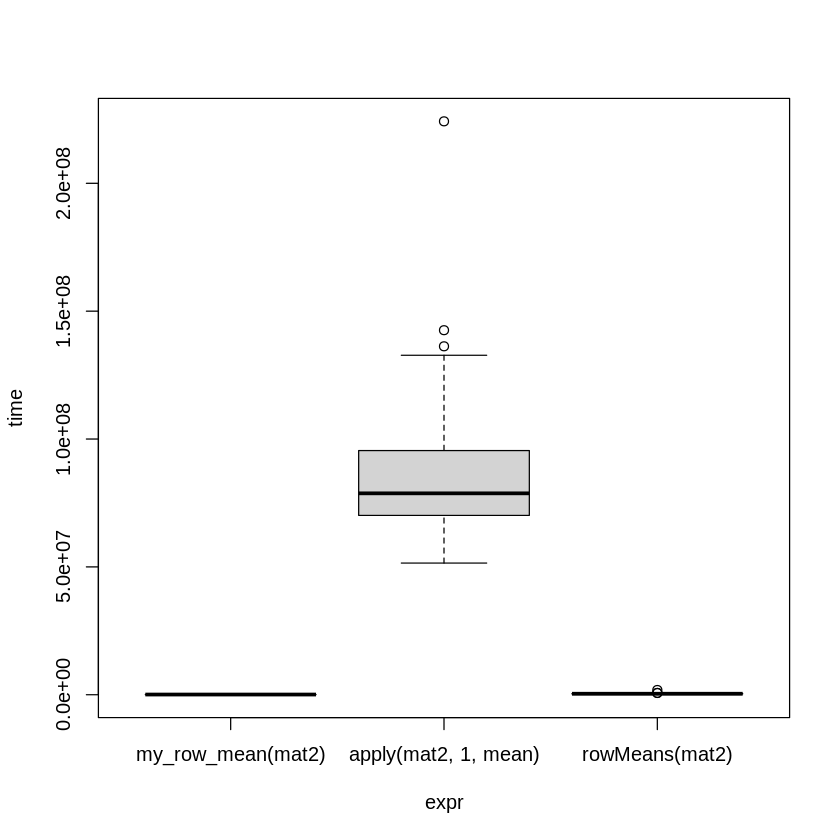

In [7]:
# compare speeds with larger matrix
mat2 <- matrix(rnorm(100000), nrow = 10000)
mean_timings <- microbenchmark(my_row_mean(mat2), apply(mat2, 1, mean), rowMeans(mat2))
plot(mean_timings)

## <a name="more-apply">More `apply` Examples</a>

---


In [8]:
# compute 0.5 quantile of columns of mat
# we specify additional arguments passed into quantile
apply(mat, 2, quantile, prob = 0.5)

[1] 3 8

In [9]:
# create a 3-dimensional array to explore apply
A <- array(1:24, dim = c(3, 2, 4))
print(A)

, , 1

     [,1] [,2]
[1,]    1    4
[2,]    2    5
[3,]    3    6

, , 2

     [,1] [,2]
[1,]    7   10
[2,]    8   11
[3,]    9   12

, , 3

     [,1] [,2]
[1,]   13   16
[2,]   14   17
[3,]   15   18

, , 4

     [,1] [,2]
[1,]   19   22
[2,]   20   23
[3,]   21   24



In [10]:
# compute means for each row of A
apply(A, 1, mean)

[1] 11.5 12.5 13.5

`11.5` comes from averaging all the values in the 1st row of `A` across all columns and the third dimension:

$$(1 + 4 + 7 + 10 + 13 + 16 + 19 + 22)/8 = 11.5.$$

The `12.5` and `13.5` come from averaging all the values in the second and third rows of `A`, respectively.

These means could be computed separately by running  the following command.

In [11]:
mean(A[1,,])

[1] 11.5

In [12]:
# compute the sums across the third dimension of A
apply(A, 3, sum)

[1]  21  57  93 129

`21` comes from adding all the values in the first element of the third dimension of `A`. More specifically, it is equivalent to running the following command.

In [13]:
sum(A[,,1])

[1] 21

Let's compute the means across the row and columns of `A`.

In [14]:
# compute the means across the row and columns of A
apply(A, 1:2, mean)

10,13
11,14
12,15


The command above returns the values obtained by averaging all of the values in a particular row and column of `A` across the third dimension of `A`.

`10` comes from averaging the values in `A[1, 1, 1]`, `A[1, 1, 2]`, `A[1, 1, 3]`, `A[1, 1, 4]`, i.e., `(1 + 7 + 13 + 19)/4 = 10`. Alternatively, it is equivalent to running the following command.

In [15]:
mean(A[1, 1, ])

[1] 10

# <a name="lapply">The `lapply` Function</a>

---



The `lapply` function applies a function to each element of an atomic vector or list. It is very convenient for performing analyses in simulation studies. The `lapply` function always returns a list.

The arguments of the `lapply` function are:

-   `X`: An atomic vector or list.
-   `FUN`: the function to be applied to each element of `X`.
-   `...`: additional arguments that need to be passed to `FUN`.

We start with a simple example that computes the sample mean of a `list` containing numeric vectors.

In [16]:
# first define the our `list`.
simple_list <- list(1:10, 11:20)
simple_list

[[1]]
 [1]  1  2  3  4  5  6  7  8  9 10

[[2]]
 [1] 11 12 13 14 15 16 17 18 19 20

In [17]:
# use lapply to compute the sample mean of each element of sample_list
lapply(simple_list, mean)

[[1]]
[1] 5.5

[[2]]
[1] 15.5

# <a name="sapply">The `sapply` Function</a>

---


The `sapply` function attempts to coerce the results of `lapply` to a `vector`, `matrix`, or `array` (whichever is simplest) using the `simplify2array` function. Technically, the `sapply` function has two additional arguments compared to `lapply`:

-   `simplify`: a logical value indicating whether the `sapply` should attempt to simplify the result using `simplify2array`.
  - The default is `TRUE`.
  - Setting to `FALSE` returns a list equivalent to `lapply`.
-   `USE.NAMES`: a logical value indicating whether names should be associated with the results.
  - The default is `TRUE`.

<font color="dodgerblue">**We don't always know that data type the `sapply` function will return, which is dangerous if we use those results in any future calculations.**</font> We repeat the previous example using `sapply` to illustrate this point.




In [18]:
# output is coerced to to be stored as a vector
sapply(simple_list, mean)

[1]  5.5 15.5

In [19]:
# output stored as a list, same as lapply
sapply(simple_list, mean, simplify = FALSE)

[[1]]
[1] 5.5

[[2]]
[1] 15.5

The `sapply` function *seems* like it is the more convenient version of `lapply`, but this is a trap. The `sapply` function can produce unexpected results because it is not required to return an object of a specific type. The result may change depending on the input.


We create a function, `add2`, that takes a `numeric` vector `x` and adds 2 to all the elements in `x` to illustrate how `sapply` determines to store the output.

In [20]:
add2 <- function(x) {
  x + 2
}

In [21]:
# confirm that add2 works as intended.
add2(2:3)

[1] 4 5

If we use `sapply` to apply `add2` to each element of `simple_list`, the result is returned as a `matrix` because the results can be simplified by `simplify2array`.

In [22]:
# applying add2 to each element of simple_list
# returns a matrix because the results can be simplified by simplify2array
simple_list

[[1]]
 [1]  1  2  3  4  5  6  7  8  9 10

[[2]]
 [1] 11 12 13 14 15 16 17 18 19 20

In [23]:
# using sapply to apply add2 to each element of simple_list
# returns a matrix because the results can be simplified by simplify2array
# output converted to column vectors
sapply(simple_list, add2)

3,13
4,14
5,15
6,16
7,17
8,18
9,19
10,20
11,21
12,22


In [24]:
# choosing not to apply simplify2array
# stores output as a list same as lapply
sapply(simple_list, add2, simplify = FALSE)

[[1]]
 [1]  3  4  5  6  7  8  9 10 11 12

[[2]]
 [1] 13 14 15 16 17 18 19 20 21 22

Let's create a second list, `simple_list2`, with two elements: the first element is a vector of 3 numeric values and the second element is a vector of 4 numeric values. If we apply `add2` to each element of `simple_list2`, the result is returned as a `list` because the results cannot be simplified by `simplify2array`.

In [25]:
simple_list2 <- list(1:3, 4:7)
simple_list2

[[1]]
[1] 1 2 3

[[2]]
[1] 4 5 6 7

In [26]:
# same command stores output as a list
sapply(simple_list2, add2)

[[1]]
[1] 3 4 5

[[2]]
[1] 6 7 8 9

# <a name="lapply">The `vapply` Function</a>

---

The `vapply` function attempts to be a safer version of `sapply` by requiring the user to indicate the data type expected from each application of `FUN`. However, `vapply` also attempts to simplify the output using `simplify2array`, so it can also create issues in later code. The `vapply` function essentially adds one additional argument to `sapply`.

-   `FUN.VALUE`: a template for the value returned by `FUN`.

If `FUN` doesn't have the same structure as `FUN.VALUE`, then `vapply` returns an error. Let's create a trivial example. We create two lists, `l1` and `l2`.

-   `l1` has two elements containing `integer` vectors.
-   `l2` has two elements containing `double` vectors.

In [27]:
l1 <- list(seq.int(1, 4), seq.int(4, 7))
l1

[[1]]
[1] 1 2 3 4

[[2]]
[1] 4 5 6 7

In [28]:
l2 <- list(seq(1.5, 4.5, by = 1), seq(4.5, 7.5, by = 1))
l2

[[1]]
[1] 1.5 2.5 3.5 4.5

[[2]]
[1] 4.5 5.5 6.5 7.5

We apply the `max` function to `l1` using `vapply`. We specify `FUN.VALUE = integer(1)` to indicate that each time we apply the `max` function to an element of `l1`, we expect to get an `integer` vector of length 1.

In [29]:
vapply(l1, max, FUN.VALUE = integer(1))

[1] 4 7

We get an error if we do the same thing for `l2` because the `max` function will return an atomic vector of type `double` of length 1. The error produced by `vapply` indicates that it was expecting to get an `integer` type by got a `double` type instead.

In [30]:
vapply(l2, max, FUN.VALUE = integer(1))

ERROR: Error in vapply(l2, max, FUN.VALUE = integer(1)): values must be type 'integer',
 but FUN(X[[1]]) result is type 'double'


## <a name="quest 3">Question 3</a>

---

Correct the issue that caused the error in the previous code cell.

In [ ]:
# correct the problem by changing FUN.VALUE to double(1)


# <a name="chick-wt">Chick Weight Data</a>

---

The `chickwts` data set in the **datasets** package is a data frame with 71 observations of 2 variables. The data provide the results of an experiment to measure and compare the effectiveness of various feed supplements on the growth rate of chickens. According to the help documentation:

> Newly hatched chicks were randomly allocated into six groups, and each group was given a different feed supplement.  Their weights in grams after six weeks are given along with feed types.

The following variables are included in the data frame:

-   `weight`: the chick's weight at six weeks (in g).
-   `feed`: a `factor` indicating the feed type.


In [ ]:
?chickwts

In [32]:
summary(chickwts)

     weight             feed   
 Min.   :108.0   casein   :12  
 1st Qu.:204.5   horsebean:10  
 Median :258.0   linseed  :12  
 Mean   :261.3   meatmeal :11  
 3rd Qu.:323.5   soybean  :14  
 Max.   :423.0   sunflower:12  

## <a name="quest4">Question 4</a>

---

Let's do some exploratory data analysis with the `chickwts` data frame.

- Create a density plot showing the distribution of weights.
- Create a bar plot showing the counts for each `feed`.
- Create side by side box plots to display the distribution of weights for each `feed` group.

In [ ]:
# create density plot of weight


In [ ]:
# create bar plot of feed


In [ ]:
# side-by-side box plots to look for possible association


# <a name="boot-apply">Bootstrap Confidence Intervals Revisited</a>

---

Suppose we want to estimate the mean weight of all chicks at six weeks using the sample data in `chickwts`.

A confidence interval is an interval estimate that gives the range of plausible values for a target parameter (such as population mean)with an associated success rate (the confidence level).

- Confidence intervals are typically constructed on the assumption that we know the population distribution from which the sample came.
  - The weights of chicks at six weeks is likely normally distributed.
  - We do not know the population mean or standard deviation.

- A bootstrap confidence interval procedure can be used to construct confidence intervals when the population distribution is unknown.

In [Module 14: Contral Statements and Iteration](https://colab.research.google.com/github/CU-Denver-MathStats-OER/Data-Wrangling-and-Visualization/blob/main/14-Control-Statements-and-Iteration.ipynb#scrollTo=fjXuOG31u1uR), we discussed how to use a `for` statement to generate bootstrap distributions from which we can construct bootstrap confidence intervals.

Suppose we have a sample of $n$ data values, $x_1, x_2, \ldots, x_n$. Then if we want to estimate a population parameter (such as a mean, $\mu$) a natural estimator is the associated statistic from a random sample (such as a sample mean, $\bar{x}$). The procedure for producing a bootstrap confidence interval for a population parameter $\theta$ is:

1.  Sample with replacement a data set of size $n$ from the observed data values. This is a bootstrap resample.
2.  Compute a sample statistic $\widehat{\theta}$ from each bootstrap resample.
3.  Perform steps 1 and 2 many times (such as $B = 10,000$ times).
4.  Let $\alpha = 1 - CL$. Compute the $\alpha/2$ and $1-\alpha/2$ quantiles of the distribution of bootstrap statistics.


In [34]:
# store sample of chicken weights to vector wt
wt <- chickwts$weight
wt

[1] 179 160 136 227 217 168 108 124 143 140 309 229 181 141 260 203 148 169 213
[20] 257 244 271 243 230 248 327 329 250 193 271 316 267 199 171 158 248 423 340
[39] 392 339 341 226 320 295 334 322 297 318 325 257 303 315 380 153 263 242 206
[58] 344 258 368 390 379 260 404 318 352 359 216 222 283 332

We can generate bootstrap resamples using the `sample()` function setting the `size = length(wt)` and `replace = TRUE`.

In [35]:
(boot_sample <- sample(wt, size = length(wt), replace = TRUE))

[1] 229 322 322 243 344 229 169 242 242 332 171 171 243 368 332 379 271 141 344
[20] 244 153 390 248 263 168 216 318 217 260 217 340 318 158 203 158 229 318 390
[39] 325 327 244 267 423 325 341 140 352 143 390 271 153 160 283 260 257 203 380
[58] 244 297 295 143 230 257 169 124 380 260 244 344 283 379

In [36]:
mean(boot_sample)

[1] 264.7183

## <a name="apply-in-fun">Using the `apply` Family When Creating Functions</a>

---

We should not use `sapply` or `vapply` inside any function to avoid problems with the output changing data types. Instead, use the `lapply` function to keep the output consistent (a list), and we can convert the output to another data structure after if needed. In the code below, we use the `lapply` function to repeatedly pick a bootstrap resample, compute the mean of the resample, and store the result to a vector named `boot_stats`.

- The vector is `1:B` gives the index values for `boot_stats`.
- We supply an *anonymous* function to the `FUN` argument of `lapply`. For each value of `i` in `1:B`:
  - Pick a bootstrap resample using the `sample()` function.
  - Calculate `mean` of the bootstrap sample.
- Output from the `lapply` function are stored to `boot_stats`.

An anonymous function is a temporary function we create to perform an action but for which we don't want to go to the trouble of storing in memory for long-term use.



-   We use the `unlist` function to convert the list of sample means in `bstats` to a `numeric` vector.

In [37]:
B <- 10000
boot_stats <- lapply(1:B, FUN = function(i) {
    boot_sample <- sample(wt, size = length(wt), replace = TRUE)  # draw bootstrap sample
    mean(boot_sample)  # compute sample mean of bootstrap sample
  })
boot_stats[1:5]

[[1]]
[1] 257.8732

[[2]]
[1] 270.2958

[[3]]
[1] 263.4085

[[4]]
[1] 270.9859

[[5]]
[1] 260.6479

In the code cell below we add some additional commands to use the values stored in `boot_stats` to construct a bootstrap confidence interval.

After storing bootstrap statistics to `boot_stats`:

-   Use the `unlist` function to convert the list of sample means in `boot_stats` to a `numeric` vector.
-   Compute the value `alpha <- 1-conf.level`.
-   We use the `quantile` function to return the `alpha/2` and `1-alpha/2` quantiles from our vector of sample means.


In [38]:
x <- wt
conf.level <- 0.95
B <- 10000

In [39]:
set.seed(43)
boot_stats <- lapply(1:B, FUN = function(i) {
  boot_sample <- sample(x, size = length(x), replace = TRUE)  # draw bootstrap sample
  mean(boot_sample)  # compute sample mean of bootstrap sample
})
boot_stats <- unlist(boot_stats)  # convert list to vector
alpha <- 1 - conf.level  # determine alpha
quantile(boot_stats, prob = c(alpha/2, 1-alpha/2))  # compute and print desired quantiles

2.5%    97.5% 
243.1120 278.7613

Let's construct a function named `bootstrap_ci()` to compute a 95% bootstrap confidence interval to estimate a population mean, $\mu$, using sample data stored in vector `x`. Our function will take three arguments:

-   `x`: A vector of numeric values.
-   `conf.level`: The confidence level desired for the interval. The default value will be `0.95`.
-   `B`: The number of bootstrap samples from which to build the confidence interval. The default value will be `10000`.



In [40]:
bootstrap_ci <- function(x, conf.level = 0.95, B = 10000) {
  boot_stats <- lapply(1:B, FUN = function(i) {
    boot_sample <- sample(x, size = length(x), replace = TRUE)  # draw bootstrap sample
    mean(boot_sample)  # compute sample mean of bootstrap sample
  })
  boot_stats <- unlist(boot_stats)  # convert list to vector
  alpha <- 1 - conf.level  # determine alpha
  quantile(boot_stats, prob = c(alpha/2, 1-alpha/2))  # compute and print desired quantiles
}

In [41]:
set.seed(43)
bootstrap_ci(wt)

2.5%    97.5% 
243.1120 278.7613

Our 95% bootstrap confidence interval for the population mean is $243.11 < \mu < 278.76$. There is a 95\% chance the interval from $243.11$ g to $278.76$ g contains the mean weight of all chicks at six weeks.



In [42]:
loop_boot_ci <- function(samp, stat, level = 0.95, N = 10^4) {
  boot_dist <- numeric(N)  # create vector to store bootstrap means
  n <- length(samp)  # store sample size
  for (i in 1:N) {
    x <- sample(samp, n, replace = TRUE)  # pick a bootstrap resample
    boot_dist[i] <- stat(x)  # compute stat of bootstrap resample
  }
  quantile(boot_dist, prob = c(alpha/2, 1-alpha/2))
}

In [43]:
set.seed(43)
loop_boot_ci(wt, mean)

2.5%    97.5% 
243.1120 278.7613

In [ ]:
# run only if you have not already loaded microbenchmark
#install.packages("microbenchmark")
#library(microbenchmark)

In [44]:
# compute a bootstrap conf int 100 times using each approach
# this code may take a couple of minutes to complete running
boot_timings <- microbenchmark(loop_boot_ci(x, mean), bootstrap_ci(x))
summary(boot_timings)

expr,min,lq,mean,median,uq,max,neval
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"loop_boot_ci(x, mean)",182.3486,205.9157,236.4110,224.3275,248.6557,362.6497,100
bootstrap_ci(x),191.9620,225.4704,258.9175,241.7895,271.3310,650.5464,100


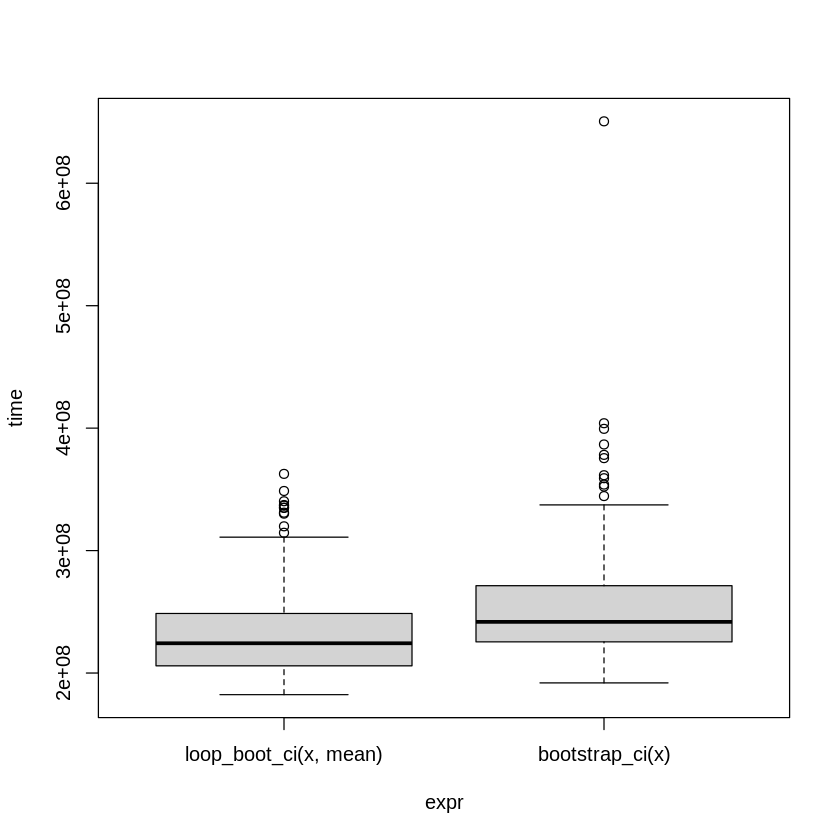

In [45]:
plot(boot_timings)

# <a name="tapply">The `tapply` Function</a>

---

The `tapply` function is used to apply a function to all the values associated with a certain level of a `factor` variable. It is useful for summarizing information for different groups of data.

The `tapply` function takes the following arguments:

-   `X`: an object for which a `split` method exists. Usually, this is a `vector` or `data.frame` object.
-   `INDEX`: a `factor` variable with the same length as `X`. This will be used to “split” `X` into different groups.
-   `FUN`: The function to be applied to each group of `X` after the `split` function is used.
-   `...`: additional arguments that will be passed to `FUN`.
-   `default`: an argument we can probably ignore. Run `?tapply` in the Console for more details about this argument.
-   `simplify`: a logical value indicating whether the result should be simplified to a scalar array.
  - The default is `TRUE` which returns an array.
  - If `FALSE`, then a `list` is returned.

We can use the `tapply` function with the `chickwts` data to summarize chick `weight` at six weeks across the different `feed` types.



In [46]:
tapply(X = chickwts$weight, INDEX = chickwts$feed, FUN = mean)

casein horsebean   linseed  meatmeal   soybean sunflower 
 323.5833  160.2000  218.7500  276.9091  246.4286  328.9167

In [47]:
tapply(X = chickwts$weight,
  INDEX = chickwts$feed,
  FUN = mean,
  simplify = FALSE
)

$casein
[1] 323.5833

$horsebean
[1] 160.2

$linseed
[1] 218.75

$meatmeal
[1] 276.9091

$soybean
[1] 246.4286

$sunflower
[1] 328.9167

The average weight of the chickens eating the `casein` feed type was 323.6 g. The average weight of the chickens eating the `soybean` feed type was 246.4 g.

We can use the `tapply` function to compute a more complex summary of each group's weights using the `summary` function.

In [48]:
tapply(X = chickwts$weight, INDEX = chickwts$feed, FUN = summary)

$casein
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  216.0   277.2   342.0   323.6   370.8   404.0 

$horsebean
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  108.0   137.0   151.5   160.2   176.2   227.0 

$linseed
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  141.0   178.0   221.0   218.8   257.8   309.0 

$meatmeal
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  153.0   249.5   263.0   276.9   320.0   380.0 

$soybean
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  158.0   206.8   248.0   246.4   270.0   329.0 

$sunflower
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  226.0   312.8   328.0   328.9   340.2   423.0 


# <a name="quest5">Question 5</a>

---

The `dplyr` package contains a data set from the [NOAA Hurricane Best
Track Data](https://www.nhc.noaa.gov/data/#hurdat) that contains data on
the following attributes of tracked North Atlantic storms since 1975:

-   Storm name: `name`
-   Date and time: `year`, `month`, `day`, and `hour`
-   Storm position: `lat` and `long`
-   Storm classification: `status`
-   Category of hurricane: `category` (non-hurricanes are `NA`)
-   Wind speed (in knots): `wind`
-   Pressure (in millibars): `pressure`
-   Tropical storm force diameter (in nautical miles): `tropicalstorm_force_diameter`
-   Hurricane force diameter (in nautical miles): `hurricane_force_diameter`

Use the `tapply` function to:

- Calculate the the total number of storms in each `month`.
- Pick a separate random sample of $n=10$ `pressure` values for each hurricane `category`. Sample with replacement.


In [ ]:
str(storms)

tibble [19,537 × 13] (S3: tbl_df/tbl/data.frame)
 $ name                        : chr [1:19537] "Amy" "Amy" "Amy" "Amy" ...
 $ year                        : num [1:19537] 1975 1975 1975 1975 1975 ...
 $ month                       : num [1:19537] 6 6 6 6 6 6 6 6 6 6 ...
 $ day                         : int [1:19537] 27 27 27 27 28 28 28 28 29 29 ...
 $ hour                        : num [1:19537] 0 6 12 18 0 6 12 18 0 6 ...
 $ lat                         : num [1:19537] 27.5 28.5 29.5 30.5 31.5 32.4 33.3 34 34.4 34 ...
 $ long                        : num [1:19537] -79 -79 -79 -79 -78.8 -78.7 -78 -77 -75.8 -74.8 ...
 $ status                      : Factor w/ 9 levels "disturbance",..: 7 7 7 7 7 7 7 7 8 8 ...
 $ category                    : num [1:19537] NA NA NA NA NA NA NA NA NA NA ...
 $ wind                        : int [1:19537] 25 25 25 25 25 25 25 30 35 40 ...
 $ pressure                    : int [1:19537] 1013 1013 1013 1013 1012 1012 1011 1006 1004 1002 ...
 $ tropicalstorm_for

In [ ]:
# calculate the the total number of storms in each month


In [ ]:
# pick a random sample of pressures for each category


## <a name="freq-table">Frequency Table example</a>

---

We can use the `tapply` function to construct a frequency table for a `numeric` variable based on a set of bins that break the variable into different intervals. Plotting a frequency table produces a histogram.

The `faithful` data set in the **datasets** package summarizes the duration and waiting time between eruptions for the Old Faithful geyser in Yellowstone National Park. The data are a data frame with 272 observations of the variables:

-   `eruptions`: eruption duration (minutes).
-   `waiting`: waiting time until next eruption (minutes).

We will create a frequency table for the `eruptions` variable. For simplicity, we start by extracting the `eruptions` variable from the `faithful` data frame.

In [49]:
eruptions <- faithful$eruptions

Next, we use the `pretty` function to automatically create breakpoints for the `eruptions` variable.

The `pretty` function has two primary arguments:

-   `x`: a `numeric` object. The range of the object is used to create the breakpoints.
-   `n`: the desired number of intervals to be created. This is often ignored by the function.

The `pretty` function attempts to produce a set of “pretty breakpoints” based on `x` and `n`. Run `?pretty` in the Console for more details about this function.

We pass `eruptions` to the `pretty` function and ask it to produce approximately 10 intervals.

In [50]:
breaks <- pretty(eruptions, n = 10)
breaks

[1] 1.5 2.0 2.5 3.0 3.5 4.0 4.5 5.0 5.5

We end up with 9 breakpoints, which will break our `eruptions` into 8 intervals.

To use the `tapply` function to count the number of values in each interval, we need to associate each eruption value with a level based on our breakpoints. Instead of using a complex loop with numerous `if` statements to categorize each eruption value, we can use the `cut` function.

The `cut` function takes two primary arguments:

-   `x`: a numeric vector that is assigned a `factor` label by “cutting”.
-   `breaks`: the breakpoints that define the intervals that “cut” `x` into different groups. Each group is assigned a different label.

We pass the `eruptions` variable and the `breaks` variable returned by the `pretty` function to `cut` to associate each eruption value with an interval. We assign these labels the name `interval_labels`. We use the `head` function to view the first values in `interval_labels`.

In [51]:
interval_labels <- cut(eruptions, breaks)
head(interval_labels)

[1] (3.5,4] (1.5,2] (3,3.5] (2,2.5] (4.5,5] (2.5,3]
Levels: (1.5,2] (2,2.5] (2.5,3] (3,3.5] (3.5,4] (4,4.5] (4.5,5] (5,5.5]

The first eruption value was in the interval (3.5, 4), the second in the interval (1.5, 2\], the third in the interval (3, 3.5\], etc.

Now, we use `tapply` to break the `eruptions` variable into 8 groups based on `interval_labels`, then use the `length` function to determine the number of eruption durations in each interval (which is the number of values observed in that interval).

In [52]:
count <- tapply(eruptions, interval_labels, length)
count

(1.5,2] (2,2.5] (2.5,3] (3,3.5] (3.5,4] (4,4.5] (4.5,5] (5,5.5] 
     55      37       5       9      34      75      54       3

There were 55 eruptions that lasted between 1.5 and 2 minutes. There were 37 eruptions that lasted between 2 and 2.5 minutes, etc.



# <a name="mapply">The `mapply` Function</a>

---

The `mapply` function is intended to be a multivariate version of `sapply`. More specifically, it will vectorize over multiple arguments instead of a single one. The main arguments of the `mapply` function are:

-   `FUN`: the function that will be applied to the arguments being vectorized over.
-   `...`: the arguments to be vectorized over.
-   `MoreArgs`: a `list` with named elements that supply additional arguments need for `FUN`.
- There are also `SIMPLIFY` and `USE.NAMES` arguments that we do not discuss.
- Run `?mapply` in a code cell for more details.

The `mapply` function is more complicated than the other `*apply` functions. It is less frequently used since there are often simpler ways to solve the problem that do not require the complexity of `mapply`. We will walk through a trivial example that uses `mapply`.

Suppose we have two vectors of the same size. The first vector contains the initials of several individuals. The second vector contains the initials of their sibling.

In [53]:
sibling1 <- c("PM", "JI", "RX", "HP", "XE")

In [54]:
sibling2 <- c("QN", "AA", "OJ", "DD", "GD")

We will use `mapply` to `paste` the names together. We set `USE.NAMES` to `FALSE` for better formatting.

In [55]:
mapply(FUN = paste, sibling1, sibling2, USE.NAMES = FALSE)

[1] "PM QN" "JI AA" "RX OJ" "HP DD" "XE GD"

This worked as expected, but the formatting is unpleasant.

We can improve the formatting of our result by changing the `sep` argument of `paste` to `" + "` or `" and "`. We can accomplish this change by passing this information in a named list through the `MoreArgs` argument.

In [56]:
mapply(FUN = paste, sibling1, sibling2, MoreArgs = list(sep = " + "), USE.NAMES = FALSE)

[1] "PM + QN" "JI + AA" "RX + OJ" "HP + DD" "XE + GD"

In [57]:
mapply(FUN = paste, sibling1, sibling2, MoreArgs = list(sep = " and "), USE.NAMES = FALSE)

[1] "PM and QN" "JI and AA" "RX and OJ" "HP and DD" "XE and GD"

Note that we must name any arguments provided after `...` in a function. The reason for this is that, otherwise, the arguments after `...` are assumed to be something intended to be passed through `...`.

This is why the code below doesn't work as intended.

In [58]:
mapply(FUN = paste, sibling1, sibling2, list(sep = " and "), FALSE)

PM                  JI                  RX                  HP 
"PM QN  and  FALSE" "JI AA  and  FALSE" "RX OJ  and  FALSE" "HP DD  and  FALSE" 
                 XE 
"XE GD  and  FALSE"

What is actually happening is that `" and "` and `"FALSE"` are being passed into `paste` with the values from `sibling1` and `sibling2`, which then pastes the four individual character strings into a single string.



# <a name="parallel">Parallel Computing and `*apply` Functions</a>

---

We can sometimes speed up the computations performed by an `*apply` function using parallel processing (processing multiple tasks *in parallel* instead of one-at-a-time).

Parallel processing is particularly helpful with using `lapply`, `sapply`, or `vapply` to perform complex analysis on a sequence of simulated data sets. The analysis can be performed on each simulated data set separately, which means the operation can be parallelized.

We provide small examples to illustrate the advantages of parallel computing when using `*apply` functions.

We start by creating a simple function, `sleep_iterator`.

-   The function takes the argument `i`, which is not used in the function, so that it is compatible with the `lapply` function.
-   Inside the function, we use `Sys.sleep(1)` to pause for one second.
-   We have the function return `NULL`.

We define `sleep_iterator` below.

In [59]:
sleep_iterator <- function(i) {
  Sys.sleep(1) # sleep for 1 second
  return(NULL) # return NULL
}

Next, we use the `lapply` function to run `sleep_iterator` 6 times.

-   `lapply` will run `sleep_iterator` for `i = 1`, `2`, `...`, `6`.
-   We time the operations performed by `lapply` using `system.time`.

Unsurprisingly, applying `sleep_iterator` six times results in an elapsed time of about 6 seconds since we pause for 1 second for each of the six values of `i`.

In [60]:
system.time(lapply(1:6, sleep_iterator))

   user  system elapsed 
  0.004   0.000   6.010 

## <a name="parallel-pack">The `parallel` Package</a>

---

The [`parallel` package](https://stat.ethz.ch/R-manual/R-devel/library/parallel/doc/parallel.pdf) (R Core Team 2025) provides parallelized equivalents of several `*apply` functions.

-   `parApply` is a parallelized version of `apply`.
-   `parLapply` is a parallelized version of `lapply`.
-   `parSapply` is a parallelized version of `sapply`.

Run `?clusterApply` to see additional details about these and related parallelized functions.

In [ ]:
# run only if you have not already loaded parallel package
#library(parallel)

In [61]:
?clusterApply

The available options and behavior for performing parallel processing depends on our computer's operating system. For example, it is easier to perform parallel computing on Macs and Linux computers. Windows computers cannot run forked processes through R.

We want to use `parLapply` to run `sleep_iterator` 6 times using parallel processing. The primary arguments of `parLapply` are:

-   `cl`: a cluster object returned by the `makeCluster` function that defines how the processes will be run in parallel.
-   `X`: the atomic vector or list to be iterated over.
-   `fun`: the function to be applied to each element of `X`.
-   `...`: additional arguments to be passed to `fun`.

We use `makeCluster` to setup a parallel processing approach that runs 2 processes in parallel. The code works in Colab and should be general that it will work on Windows, Mac, or Linux computers if running the notebook locally instead of in the cloud.

A CPU core is a physical processing unit within a processor (CPU) that can independently execute code. Multiple cores enable a computer to perform multiple tasks in parallel.

In [62]:
# check number of cores available in Colab or on computer
detectCores()

[1] 2

In [63]:
cl <- makeCluster(getOption("cl.cores", 2))

We once again use `system.time` to time how long it takes to run `sleep_iterator` 6 times.

In [66]:
system.time(parLapply(cl, 1:6, sleep_iterator))

   user  system elapsed 
  0.003   0.000   3.006 

Since we are running `sleep_iterator` in parallel using 2 processes, it only takes about 3 seconds to complete our computations instead of the original 6 seconds!




## <a name="future-apply">The `future.apply` Package</a>

---

The [`future.apply` package](https://cran.r-project.org/web/packages/future.apply/index.html) (Bengtsson 2024) provides parallelized implementations of several `*apply` functions. The advantage of the `future.apply` package is that code can be created that generalizes from being “evaluated on the local machine, in parallel a set of local machines, or distributed on a mix of local and remote machines” Bengtsson (2021).


In [ ]:
# run only if you have not already loaded future.apply package
#install.packages("future.apply")
#library(future.apply)

To perform a parallelized operation using `future.apply`, we must use the `plan` function to describe how we want the parallel processing to be performed.

The code below sets up a plan to run 2 processes in parallel using a `"multisession"` approach. Run `?plan` in the Console for more details.

In [67]:
plan(multisession, workers = 2)

Finally, we use the `future_lapply` function to run the `sleep_iterator` function 6 times. The function works identically to the `lapply` function, but uses the parallelization plan to speed up the computations. Similar to before, it only takes about 3 seconds to run the `sleep_iterator` function 6 times because we are running two processes in parallel.

In [69]:
system.time(future_lapply(1:6, FUN = sleep_iterator))

   user  system elapsed 
  0.491   0.021   3.306 

## <a name="pbapply">The `pbapply` Package</a>

---

The [`pbapply` package](https://cran.r-project.org/web/packages/pbapply/index.html) (Solymos and Zawadzki 2023) creates equivalents of many `*apply` functions that add progress bars showing the time remaining to complete the computation.

-   Many of these functions are equipped to use parallel processing through the `parallel` package.
  - We must set the `cl` argument with a `makeCluster` object to use this functionality.
-   Run `?pbapply` in a code cell for a complete list of available functions.

In [ ]:
# run only if you have not already loaded pbapply package
#install.packages("pbapply")
#library(pbapply)

The `pblapply` function is an equivalent of `lapply` that includes a progress bar. *The progress bar will not display if running in Colab.* We can provide a cluster object from the `makeCluster` function to perform the computations in parallel.

We use `pblapply` to run `sleep_iterator` 6 times. We use the previously created cluster object, `cl`, which runs 2 processes in parallel. Similar to before, our code runs in about 3 seconds while also showing a progress bar.

In [70]:
system.time(pblapply(1:6, FUN = sleep_iterator, cl = cl))

   user  system elapsed 
  0.002   0.001   3.006 

## <a name="CC License">Creative Commons License Information</a>
---

![Creative Commons
License](https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png)

Materials created by the [Department of Mathematical and Statistical Sciences at the University of Colorado Denver](https://github.com/CU-Denver-MathStats-OER/)
and is licensed under a [Creative Commons
Attribution-NonCommercial-ShareAlike 4.0 International
License](http://creativecommons.org/licenses/by-nc-sa/4.0/).